<a href="https://colab.research.google.com/github/cakrabudiman/Social-Media-Analysis-Final-Task/blob/main/AJS_Final_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Analisis Centrality untuk Menentukan Pengguna Twitter yang Berpengaruh dalam Topik Kesehatan Mental: Studi Visualisasi dengan Gephi

Akhdiyat Dezza Prasetyo - 1301213242 <br>
Cakra Budiman Putra - 1301213273



**Library**

In [ ]:
!pip install python-louvain


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from collections import defaultdict
import networkx as nx
import networkx.algorithms.community as nx_comm
import requests

In [ ]:
import pandas as pd
import csv

def clean_and_parse_line(line):
    # Ensure the line is a string, strip extra semicolons at the end and new line characters, then split
    line = line.strip().rstrip(';').rstrip('\n')
    split_line = line.split('","')
    return [s.strip('"') for s in split_line]

# Path to the CSV file
data_path = '/content/ajs.csv'

# Reading and cleaning the data
cleaned_data = []
with open(data_path, 'r', encoding='utf-8') as file:
    for line in file:
        if line.strip():  # Ensure the line is not empty
            parsed_line = clean_and_parse_line(line)
            cleaned_data.append(parsed_line)

# Create DataFrame from the cleaned data
# Extracting the first row for column headers and the rest for the data
final_dataframe = pd.DataFrame(cleaned_data[1:], columns=cleaned_data[0])
print(final_dataframe.head())


                    conversation_id_str,""created_at favorite_count  \
0  1860711612132540810,""Mon Nov 25 12:37:42 +000...              0   
1  1861024024350093792,""Mon Nov 25 12:28:01 +000...              0   
2  1861020976601063651,""Mon Nov 25 12:15:51 +000...              1   
3  1861019154427568361,""Mon Nov 25 12:08:37 +000...              1   
4  1861012697019744520,""Mon Nov 25 11:42:57 +000...              0   

                                           full_text               id_str  \
0  @rakeanradya Pasar yang bebas mendorong kompet...  1861026476705107985   
1  Rosan menjelaskan ada beberapa kesepakatan yan...  1861024039353131298   
2  PLN tengah menjalankan beragam langkah strateg...  1861020976601063651   
3  PLN terus menunjukkan komitmen dalam mendukung...  1861019154427568361   
4  Pemanfaatan Energi Terbarukan Dorong Swasembad...  1861012697019744520   

                                         image_url in_reply_to_screen_name  \
0  https://pbs.twimg.com/media/G

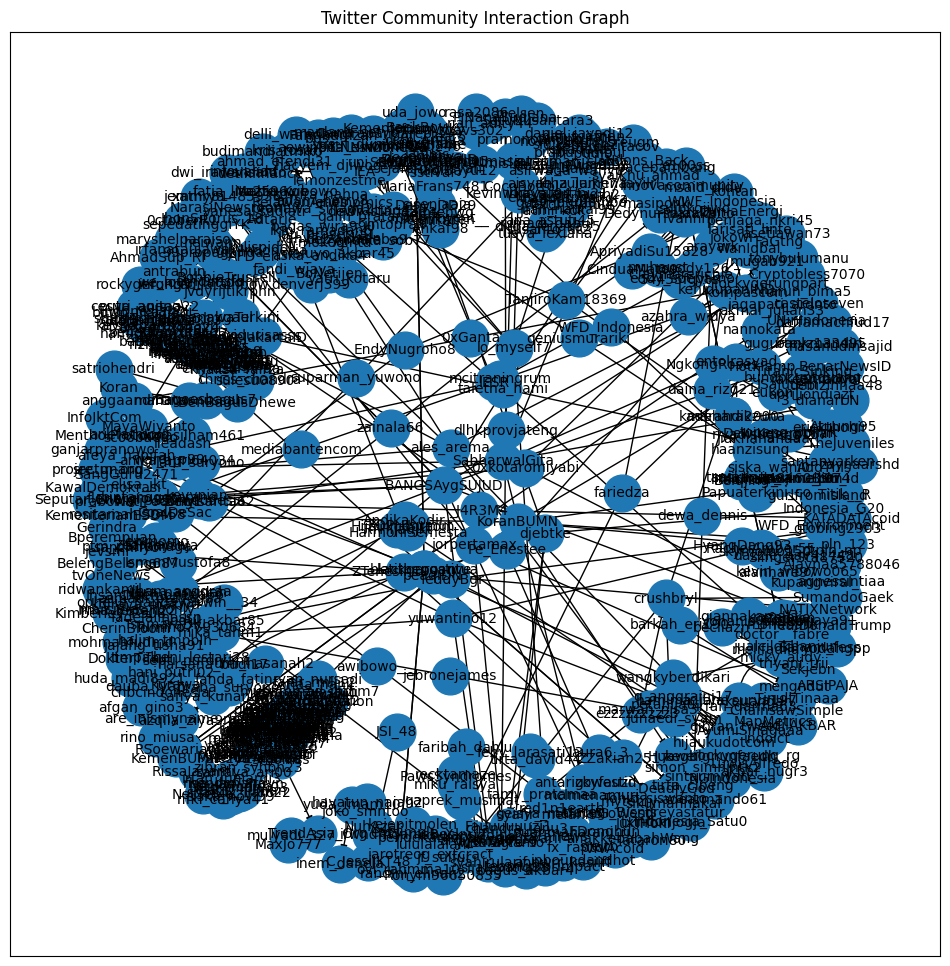

In [ ]:
# Function to extract mentions from tweet text
def extract_mentions(text):
    # Regular expression to find mentions
    mentions = re.findall(r'@\w+', text)
    return mentions

# Initialize a directed graph
G = nx.DiGraph()

# Loop through each row in the DataFrame
for index, row in final_dataframe.iterrows():
    user = row['username']  # User who tweeted
    # Extract mentions from the full_text
    mentions = extract_mentions(row['full_text'])
    # Add an edge from the user to each mentioned user
    for mention in mentions:
        mention_clean = mention.replace('@', '')  # Clean the '@' from the mention
        if user and mention_clean:  # Check if both are not None or empty
            G.add_edge(user, mention_clean, weight=1)

# Set up the plot with a specific figure size
plt.figure(figsize=(12, 12))
# Layout settings for the graph
pos = nx.spring_layout(G, seed=42)  # Deterministic layout for consistent placement
# Draw nodes, edges, and labels on the graph
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
# Title for the graph
plt.title('Twitter Community Interaction Graph')
# Display the graph
plt.show()

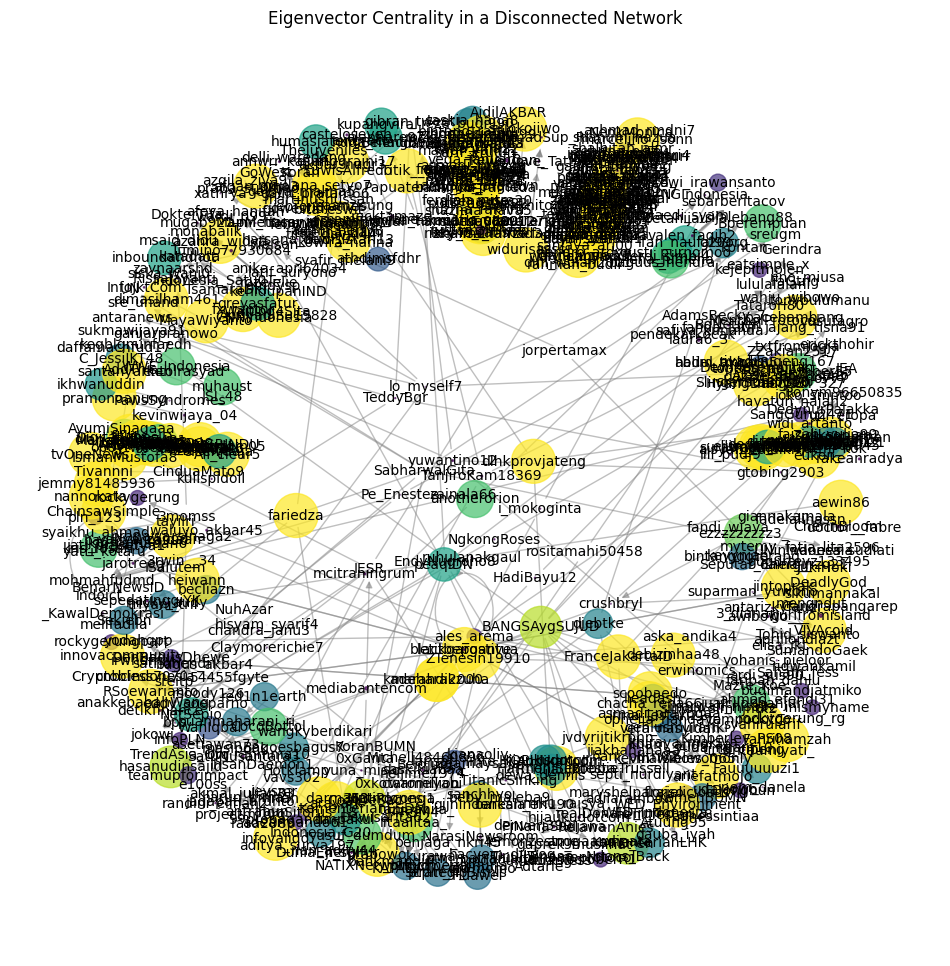

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is already created as a directed graph
if nx.is_weakly_connected(G):
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
else:
    eigenvector_centrality = {}
    for component in nx.weakly_connected_components(G):
        subgraph = G.subgraph(component)
        sub_eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=1000)
        eigenvector_centrality.update(sub_eigenvector_centrality)

# Visualization
pos = nx.spring_layout(G)  # Node positions
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in eigenvector_centrality.values()],
                       cmap=plt.get_cmap('viridis'), node_color=list(eigenvector_centrality.values()), alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Eigenvector Centrality in a Disconnected Network')
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx

# Assuming 'G' is already created and is your NetworkX graph

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)
closeness_centrality = nx.closeness_centrality(G)

# Function to sort and get top influencers
def get_top_influencers(centrality_dict, num_top=5):
    # Sorting the nodes by centrality value in descending order and extracting the top 'num_top'
    top_influencers = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)[:num_top]
    return top_influencers

# Getting top 5 influencers for each centrality measure
top_degree = get_top_influencers(degree_centrality)
top_betweenness = get_top_influencers(betweenness_centrality)
top_eigenvector = get_top_influencers(eigenvector_centrality)
top_closeness = get_top_influencers(closeness_centrality)

# Print top influencers for each centrality measure
print("Top Degree Centrality Influencers:")
for influencer in top_degree:
    print(f"{influencer[0]}: {influencer[1]:.4f}")

print("\nTop Betweenness Centrality Influencers:")
for influencer in top_betweenness:
    print(f"{influencer[0]}: {influencer[1]:.4f}")

print("\nTop Eigenvector Centrality Influencers:")
for influencer in top_eigenvector:
    print(f"{influencer[0]}: {influencer[1]:.4f}")

print("\nTop Closeness Centrality Influencers:")
for influencer in top_closeness:
    print(f"{influencer[0]}: {influencer[1]:.4f}")


Top Degree Centrality Influencers:
NenkMonica: 0.1236
IndonesiaJadi: 0.0748
dian_arifiya: 0.0374
sidiksopian2: 0.0341
fahmi_razaq44: 0.0244

Top Betweenness Centrality Influencers:
IESR: 0.0000
Hijaukudotcom: 0.0000
eddy_soeparno: 0.0000
crushbryl: 0.0000
royan_riski: 0.0000

Top Eigenvector Centrality Influencers:
indoict: 1.0000
NenkMonica: 0.0001
jokowi: 0.0001
hijaukudotcom: 0.0000
timpakul: 0.0000

Top Closeness Centrality Influencers:
NenkMonica: 0.1237
IndonesiaJadi: 0.0748
dian_arifiya: 0.0374
sidiksopian2: 0.0341
fahmi_razaq44: 0.0228


NameError: name 'top_influencers' is not defined

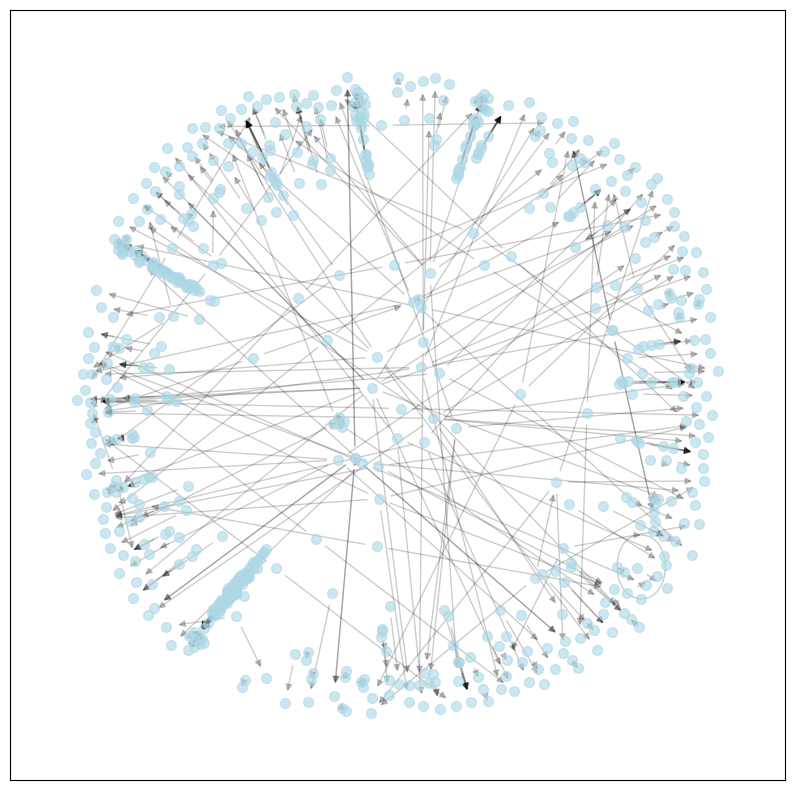

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example: Assuming 'G' is your graph and 'top_influencers' contains your previously calculated top influencers
# Setup fixed random seed for reproducibility
seed = 42

# Calculate positions once and reuse them
pos = nx.spring_layout(G, seed=seed)  # Use a fixed seed for consistent node positions

# Create the plot
plt.figure(figsize=(10, 10))

# Draw all nodes with a basic setup
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=50, alpha=0.6)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Highlight influencers from different centrality measures
colors = ['red', 'green', 'blue', 'yellow']
labels = ['Degree', 'Betweenness', 'Eigenvector', 'Closeness']
for idx, (centrality_type, influencers) in enumerate(top_influencers.items()):
    # Extract only the top influencer nodes for each type
    influencer_nodes = [node for node, _ in influencers]
    nx.draw_networkx_nodes(G, pos, nodelist=influencer_nodes, node_color=colors[idx],
                           label=f'{labels[idx]}', node_size=200, alpha=0.8)

# Draw labels for all nodes (optional, can limit to influencers)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='darkblue')

plt.title('Key Influencers in the Network')
plt.legend(title="Centrality Type")
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
nx.write_gexf(G, '/content/Twitter_Komunitas.gexf')